# Linear Random Forest

In [1]:
from sklearn.linear_model import LinearRegression, Ridge
from lineartree import LinearTreeRegressor
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import time

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.regression_metrics import regression
from notebooks.utils.lrf import LinearRandomForestRegressor

In [4]:
train =  pd.read_parquet('../../../data/model_input/train_sets/superconductivity.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/superconductivity.parquet')

In [5]:
y_train = train.critical_temp
X_train = train.drop(columns=['critical_temp'])

In [6]:
y_validation = validation.critical_temp
X_validation = validation.drop(columns=['critical_temp'])

In [7]:
scaler = StandardScaler().fit(X_train)

In [8]:
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

In [9]:
scaler = StandardScaler().fit(X_train)

In [10]:
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

In [11]:
n_estimators = [2, 5, 7, 10, 15, 17, 20, 25, 30, 35, 40]

In [12]:
max_depth = [1, 2]
base_mod = [LinearRegression(), Ridge()]

In [13]:
base_est = []
for i in max_depth:
    for mod in base_mod:
        base_est.append(LinearTreeRegressor(base_estimator=mod, max_depth=i))

In [14]:
models_list = []
names_list = []
for n in n_estimators:
    for estim in base_est:
        models_list.append(LinearRandomForestRegressor(n_features=X_train.shape[1], est=estim, n_est=n))
        if isinstance(estim.base_estimator, LinearRegression):
            names_list.append(f'LRF_{n}_{estim.max_depth}')
        else:
            names_list.append(f'LRF_{n}_{estim.max_depth}_l2')

In [44]:
metrics = regression(models_list, names_list, '../../../data/model_output/metrics/superconductivity/lrf.csv', X_train_scaled, y_train, X_validation_scaled, y_validation)
metrics.sort_values(by='Validation_RMSE')

,Run_Time,Train_RMSE,Validation_RMSE,delta%
LRF_30_2_l2,65.778291,16.731539,17.198797,2.792677
LRF_7_2_l2,16.172772,16.898597,17.352013,2.683158
LRF_25_2_l2,47.142109,16.690442,17.358028,3.999810
LRF_35_2,84.753917,16.922856,17.451884,3.126116
LRF_15_2_l2,32.553860,17.077028,17.497182,2.460347
LRF_35_2_l2,69.600894,17.014208,17.512479,2.928555
LRF_5_2,11.992800,16.991539,17.616868,3.680235
LRF_17_2,48.563724,17.278116,17.701723,2.451697
LRF_10_2,24.190091,150.391028,17.766205,-88.186659
LRF_30_2,68.742891,17.319395,17.848356,3.054153


**LRF_30_2_l2** is the best.

In [45]:
test =  pd.read_parquet('../../../data/model_input/test_sets/superconductivity.parquet')

In [46]:
y_test = test.critical_temp
X_test = test.drop(columns=['critical_temp'])

In [47]:
retrain = pd.concat([train, validation])

In [48]:
y_retrain = retrain.critical_temp
X_retrain = retrain.drop(columns=['critical_temp'])

In [49]:
scaler_retrain = StandardScaler().fit(X_retrain)

In [50]:
X_retrain_scaled = scaler_retrain.transform(X_retrain)
X_test_scaled = scaler_retrain.transform(X_test)

In [51]:
time1 = time.time()
model = LinearRandomForestRegressor(n_features=X_retrain.shape[1], est=LinearTreeRegressor(base_estimator=Ridge(), max_depth=2), n_est=30).fit(X_retrain_scaled, y_retrain)
time2 = time.time() - time1

In [52]:
test_pred = model.predict(X_test_scaled)
rmse = root_mean_squared_error(y_test, test_pred)
print('Test RMSE:', round(rmse, 4))

Test RMSE: 18.363


In [53]:
train_pred = model.predict(X_retrain_scaled)
rmse_train = root_mean_squared_error(y_retrain, train_pred)

In [54]:
with open('../../../data/model_output/metrics/superconductivity/final_metrics.txt', 'a') as f:
     f.write(f'\nLRF; {time2}; {rmse_train}; {rmse}')

In [55]:
dump(model, '../../../data/model_output/models/superconductivity/best_lrf.joblib')

['../../../data/model_output/models/superconductivity/best_lrf.joblib']

C:\Users\MANUEL~2\AppData\Local\Temp/ipykernel_3196/1387393881.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_retrain.min(), y_retrain.max()], [y_retrain.min(), y_retrain.max()],


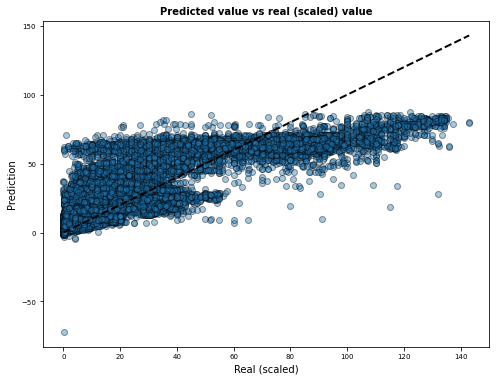

In [56]:
prediction_retrain = model.predict(X_retrain_scaled)
error_retrain   = prediction_retrain - y_retrain

plt.figure(figsize=(8, 6))

plt.scatter(y_retrain, prediction_retrain, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_retrain.min(), y_retrain.max()], [y_retrain.min(), y_retrain.max()],
                'k--', color = 'black', lw=2)
plt.title('Predicted value vs real (scaled) value', fontsize = 10, fontweight = "bold")
plt.xlabel('Real (scaled)')
plt.ylabel('Prediction')
plt.tick_params(labelsize = 7)